In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

In [2]:
raw_df = pd.read_csv("data.csv")

clear = raw_df.drop(
    ['MONTH_NAME','DISPLAY_ORDER','yearToDate','previousYearToDate','TIME']
    ,axis=1
    )

clear["DATE"] = pd.to_datetime(
    clear["YEAR"].apply(str)+'/'+clear["MONTH"].apply(str)+'/'+str(1)
    )

clear = clear.set_index(clear["DATE"]).drop(["MONTH","YEAR",'CODE_TIME',"DATE"],axis=1)

In [3]:
polska = clear.loc[(clear["COUNTRY"] == "Poland")]
Hungary = clear.loc[(clear["COUNTRY"] == "Hungary")]

In [4]:
#lista danych do pobrania
pd.DataFrame(polska["PRODUCT"][:25])

,PRODUCT
DATE,
2010-01-01,Hydro
2010-01-01,Wind
2010-01-01,Solar
2010-01-01,Geothermal
2010-01-01,Total combustible fuels
2010-01-01,Coal
2010-01-01,Oil
2010-01-01,Natural gas
2010-01-01,Combustible renewables


In [5]:
kraj = Hungary
coal = pd.DataFrame(kraj.loc[kraj['PRODUCT'] == 'Coal'].reset_index())
Renewables = pd.DataFrame(kraj.loc[kraj['PRODUCT'] == 'Renewables'].reset_index())
Distribution_losses = pd.DataFrame(kraj.loc[kraj['PRODUCT'] == 'Distribution losses'].reset_index())

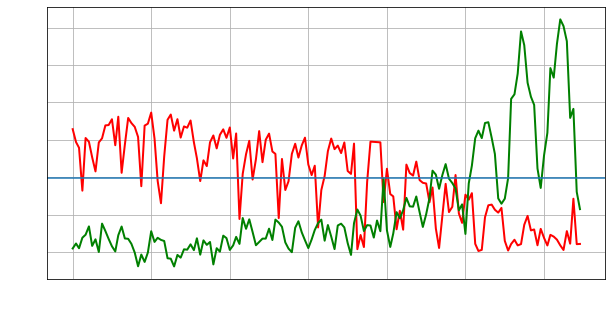

In [6]:
fig,ax = plt.subplots(figsize = (10,5))
ax.plot(coal["DATE"],coal["VALUE"], color='r',linewidth=2.0)
ax.plot(Renewables["DATE"],Renewables["VALUE"], color='g',linewidth=2.0)
plt.axhline(y=coal["VALUE"].mean())


ax.set(xlabel='czas', ylabel='moc')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(colors='white', which='both')
ax.grid()


plt.show()